In [1]:
# HIDDEN
from datascience import *
%matplotlib inline

import matplotlib.pyplot as plots
from mpl_toolkits.mplot3d import Axes3D
plots.style.use('fivethirtyeight')
import pylab as pl
import math
from scipy import stats
from scipy import misc
import pandas as pd
import statsmodels.api as sm
import numpy as np

## The t Distribution

The $t$ distributions of probability and statistics are frequently used in classical inference based on regression models and indeed numerous other chance models as well. In this section we will examine these distributions and their use, not as much for the purpose of developing a new technique as for observing that the methods that you have already learned in the course are excellent alternatives.

Here is an example of how a $t$ statistic appeared in the regressions that we have performed; this one appeared in the regression of bird weight on egg weight.

![t output](assets/images/t_fig1.png)

We have already studied the column containing confidence intervals. Before we examine what the rest of the output means, let us get a general overview of the $t$ distributions. They are often used for making inferences about population means. Of course, we have already developed several methods for such inference – one of those was to construct confidence intervals for a population mean based on the normal curve. Methods based on the $t$ distributions refine two aspects of our calculations.

First, recall that we estimated the SE of the sample mean because we did not know the population SD:
$$
\mbox{SE of sample mean} ~=~ \frac{\mbox{SD of population}}{\sqrt{\mbox{sample size}}}
~ \approx ~ \frac{\mbox{SD of sample}}{\sqrt{\mbox{sample size}}}
$$
This approximation is good when the sample size is large. Methods based on the $t$ distributions say that we can do better (under a particular set of assumptions and a particular criterion for "better"), by using a slightly bigger estimate of the SD of the population, allowing ourselves more room for error. However, it turns out that this estimate is essentially the same as ours for large samples. Those among you who are interested in the details should start by recalling that an SD is the root mean square of deviations from average, and that therefore the calculation of the SD of the sample involves dividing the sum of the squared deviations by the sample size. The $t$-based methods say that it is better to divide by "sample size - 1". This does result in a slightly bigger estimate of the population SD, but the difference is hardly noticeable when the sample size is even moderate.

Next, recall that we used the normal curve to construct confidence intervals for the population mean, as the Central Limit Theorem implies that the probability distribution of the mean of a large sample is roughly normal regardless of the distribution of the population. The $t$-based methods say that it is better to use a different bell-shaped curve instead. This curve belongs to a family of curves known as the $t$ curves. There is one $t$ curve for each positive integer; the integer is its label, formally and rather unintuitively known as the "degrees of freedom" of the curve. Which one you use typically depends on sample size. For example, the smallest sample based on which you can make inferences for a population mean is a sample of size 2. So this sample size corresponds to using $t$ curve number 1, or "the $t$ distribution with 1 degree of freedom." If you were estimating a population mean based on a random sample of size 5, you would use the $t$ curve with 4 degrees of freedom; and so on. However, these details typically make little difference, because for all but the smallest degrees of freedom, the $t$ curves are very close indeed to the standard normal curve. 

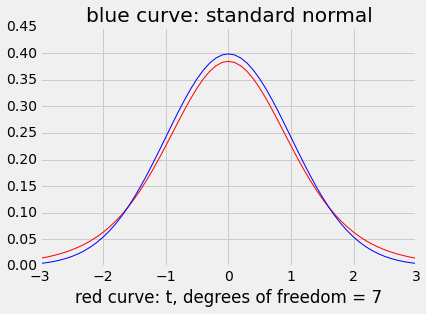

In [11]:
d = 7 # degrees of freedom
x = np.arange(-3, 3.01, .1)
tpdf = stats.t.pdf(x, df=d)
zpdf = stats.norm.pdf(x)
plots.plot(x, tpdf, lw = 1, color='r')
plots.plot(x, zpdf, lw=1, color='b')
plots.xlim(-3, 3)
plots.ylim(0, 0.45)
plots.xlabel('red curve: t, degrees of freedom = '+ str(d))
plots.title('blue curve: standard normal')

Vary the degress of freedom ``d`` in the code above to see how the $t$ curves compare with the normal curve. As you can see, they are hardly distinguishable from the standard normal curve, except when the degrees of freedom are less than about 10 or so. Their tails are larger than the tails of the normal, allowing more room for error. But for all practical purposes, when the sample size is even moderate you won't go far wrong in thinking of the $t$ statistic as simply a $z$-score.

It therefore comes as no surprise that if a $t$-statistic is 10.336, then there is almost no probability in the tail beyond it. That is why the two-tailed $P$-value in the line corresponding to ``e_weight`` is 0 to three decimal places.

![t output](assets/images/t_fig1.png)

###The $t$-test for whether the true slope is 0
But exactly what is being tested in the table above? To answer this, recall that we have examined the confidence interval for a slope to see whether it contains 0; if it does, then we are justified in concluding that there might be no genuine linear component in the relation between the predictor and the response. The $t$ test summarized in the table above provides another way of addressing this question. Focus on the line corresponding to ``e_weight``. The hypotheses being tested are:

**Null**: The true slope of ``e_weight`` is 0.

**Alternative**: The true slope is not 0.

The hypotheses assume that the regression model holds; the true slope, therefore, is known only to Tyche. The values in the table imply that under the null hypothesis, the expected slope is 0 give or take a standard error of 0.070. The observed slope is 0.7185. In standard units under the null hypothesis, this becomes (0.7185 - 0)/0.070 = 10.26. That's essentially the same as the displayed $t$-statistic; the difference is because of rounding in displayed values of the estimate and its standard error. The large value of $t$ corresponds to a vanishingly small $P$-value. Therefore the data support the alternative: assuming a 5% cutoff for the test: the true slope is not 0. 

This is consistent with the fact that the 95% confidence interval for the slope does not contain 0. Since we have the confidence interval, the $t$ test is redundant for practical purposes.

**Notes**

- The $t$-statistic in the line corresponding to the intercept is for a test of whether the true intercept is 0. 
- The $t$ curve used in both the tests has 42 degrees of freedom, almost exactly the same as the normal curve. To see which $t$ curve is being used in regression output, look for output that gives the "degrees of freedom of the residuals". That's ``Df Residuals`` in the first table below.

![t df output](assets/images/t_fig2.png)

- The slope, its standard error, and the 95% confidence interval for the slope in the table above have all been estimated using formulas that are based on the regression model. This course does not cover all those formulas. Instead, the methods of the course allow you to estimate all of these quantities by using the familiar bootstrap method: bootstrap the scatter diagram repeatedly, compute the slope for each iteration of the bootstrap, and draw their histogram. The central 95% interval of this histogram forms your 95% confidence interval for the true slope; the center of the interval (alternatively, the mean of all the generated slopes), is your estimate of the true slope; the SD of all the generated slopes is your estimate for the standard error. Because the sample size is substantial, your bootstrap results will be close to those calculated using the relevant math formulas.


###General Remarks about $t$-tests


- Typically, these are tests for population means and regression slopes. You can use the bootstrap instead. The bootstrap makes sense, it's easy to remember and execute, and it doesn't rely on lots of assumptions.
- Unless the sample size is really tiny, any $t$-curve being used is essentially the same as the standard normal curve. When you see a $t$ statistic, think $z$.
- When sample sizes are small, the Central Limit Theorem doesn't apply, and assumptions really matter. Here are examples of assumptions under which $t$-tests are justified.
    - $t$-test for a population mean: The distribution of the unknown population is normal, but we don't know its mean or its SD. It can be hard to check this assumption. You certainly can't justify it based on your small sample, and it is not always clear how it can be justified by other considerations.
    - $t$-test for the difference between two population means: When two samples are being compared, there are two underlying unknown population SDs. These are often assumed to be equal because then the math works out nicely. But the assumptions can be a bit hard to swallow: we don't know the populations, but we assume that both are normal; we don't know the means or the SDs, but we assume that the two SDs are equal.

- Calculations get complicated, for example if you don't make the assumption about equal SDs above. Here, from Wikipedia, is the calculation for the appropriate degrees of freedom in that case:

![welch df](assets/images/welch_t.png)

Formulas like this have a way of dampening the spirits, especially when there's little gain from all the pain: you just get a curve that is very close to the old familiar standard normal. 

### Conclusion

If you must use a $t$-test, please first provide an explanation of why you believe the assumptions underlying the method are justified for your data. This is a step that is forgotten all too often. We recommend simply using the bootstrap instead. There are no normality assumptions, no worries about whether SDs are equal, no messy formulas – and the results are just as good. All methods of inference have difficulties when samples are small. In that situation especially, it is better to work with a method like the bootstrap that makes very few assumptions.